In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("4. covid_19_data.csv")

In [3]:
data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [4]:
data.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [6]:
data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

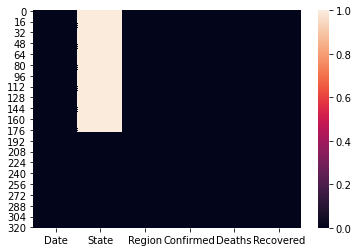

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull())
plt.show()

Show the number of Confirmed, Deaths and Recovered cases in each region

In [8]:
data.groupby('Region').sum()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


The confirmed and Recovered cases in each region are as follows

In [9]:
data.groupby('Region')[['Confirmed','Recovered']].sum()

,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
...,...,...
West Bank and Gaza,344,71
Western Sahara,6,5
Yemen,6,1


Text(0, 0.5, 'Frequency')

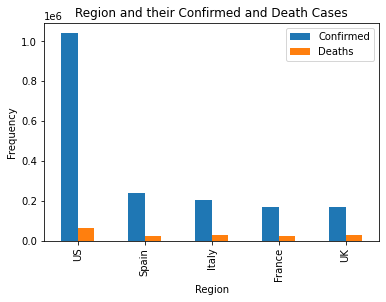

In [10]:
new = data.groupby('Region')[['Confirmed','Deaths']].sum().sort_values(by = ['Confirmed'],ascending = False, inplace=False).head(5)
new.reset_index()
new.reset_index().plot(
    x="Region", y=["Confirmed", "Deaths"], kind="bar"
)
plt.title("Region and their Confirmed and Death Cases")
plt.xlabel("Region")
plt.ylabel("Frequency")

In [11]:
data.groupby('Region')[['Confirmed','Recovered']].sum().sort_values(by = ['Confirmed']).head(20)

,Confirmed,Recovered
Region,,
Yemen,6,1
Western Sahara,6,5
Bhutan,7,5
Papua New Guinea,8,0
Sao Tome and Principe,8,4
Mauritania,8,6
MS Zaandam,9,0
Gambia,10,8
Holy See,10,2


In [12]:
data.groupby('Region')[['Confirmed','Recovered']].sum().sort_values(by = ['Confirmed'],ascending = False).head(20)

,Confirmed,Recovered
Region,,
US,1039909,120720
Spain,236899,132929
Italy,203591,71252
France,166543,49118
UK,166441,857
Germany,161539,120400
Turkey,117589,44040
Russia,99399,10286
Iran,93657,73791


Remove all cases where Confrimed Cases is less than 10

In [13]:
data[data.Confirmed < 10]

,Date,State,Region,Confirmed,Deaths,Recovered
18,4/29/2020,NaN,Bhutan,7,0,5
98,4/29/2020,NaN,MS Zaandam,9,2,0
105,4/29/2020,NaN,Mauritania,8,1,6
126,4/29/2020,NaN,Papua New Guinea,8,0,0
140,4/29/2020,NaN,Sao Tome and Principe,8,0,4
177,4/29/2020,NaN,Western Sahara,6,0,5
178,4/29/2020,NaN,Yemen,6,0,1
184,4/29/2020,Anguilla,UK,3,0,3
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
194,4/29/2020,British Virgin Islands,UK,6,1,3


In [14]:
data[~(data.Confirmed < 10)]

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In which Region, maximum cases were recorded?

In [15]:
data.groupby('Region')['Confirmed'].sum().sort_values(ascending = False, inplace=False).head(20)

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Brazil              79685
Canada              52865
Belgium             47859
Netherlands         38998
Peru                33931
India               33062
Switzerland         29407
Ecuador             24675
Portugal            24505
Saudi Arabia        21402
Name: Confirmed, dtype: int64

In which region, minimum number of deaths were recorded?

In [16]:
data.groupby('Region')['Deaths'].sum().sort_values(ascending = True, inplace = False).head(40)

Region
Laos                                0
Mongolia                            0
Mozambique                          0
Cambodia                            0
Fiji                                0
Namibia                             0
Nepal                               0
Madagascar                          0
Macau                               0
Papua New Guinea                    0
Rwanda                              0
Saint Kitts and Nevis               0
Bhutan                              0
Dominica                            0
Central African Republic            0
Saint Lucia                         0
Holy See                            0
Sao Tome and Principe               0
Yemen                               0
Western Sahara                      0
Eritrea                             0
Vietnam                             0
Saint Vincent and the Grenadines    0
Timor-Leste                         0
Uganda                              0
Grenada                             0
South

How many Confirmed Deaths and recovered cases were reported from India till 29 April,2020?

In [17]:
data[data.Region == 'India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


Sort the entire data with respect to No. of Confirmed cases in ascending order.

In [18]:
data.sort_values(by=['Confirmed'],ascending = True).head(50)

,Date,State,Region,Confirmed,Deaths,Recovered
285,4/29/2020,Recovered,US,0,0,120720
284,4/29/2020,Recovered,Canada,0,0,20327
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
305,4/29/2020,Tibet,Mainland China,1,0,1
289,4/29/2020,Saint Pierre and Miquelon,France,1,0,0
184,4/29/2020,Anguilla,UK,3,0,3
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
272,4/29/2020,Northwest Territories,Canada,5,0,0
288,4/29/2020,Saint Barthelemy,France,6,0,6
178,4/29/2020,NaN,Yemen,6,0,1


Sort the entire data with respect to No. of Confirmed cases in ascending order.

In [19]:
data.sort_values(by=['Confirmed'],ascending = False).head(50)

,Date,State,Region,Confirmed,Deaths,Recovered
265,4/29/2020,New York,US,299691,23477,0
153,4/29/2020,NaN,Spain,236899,24275,132929
80,4/29/2020,NaN,Italy,203591,27682,71252
168,4/29/2020,NaN,UK,165221,26097,0
57,4/29/2020,NaN,France,165093,24087,48228
61,4/29/2020,NaN,Germany,161539,6467,120400
167,4/29/2020,NaN,Turkey,117589,3081,44040
262,4/29/2020,New Jersey,US,116365,6771,0
134,4/29/2020,NaN,Russia,99399,972,10286
76,4/29/2020,NaN,Iran,93657,5957,73791


<AxesSubplot:xlabel='count', ylabel='Region'>

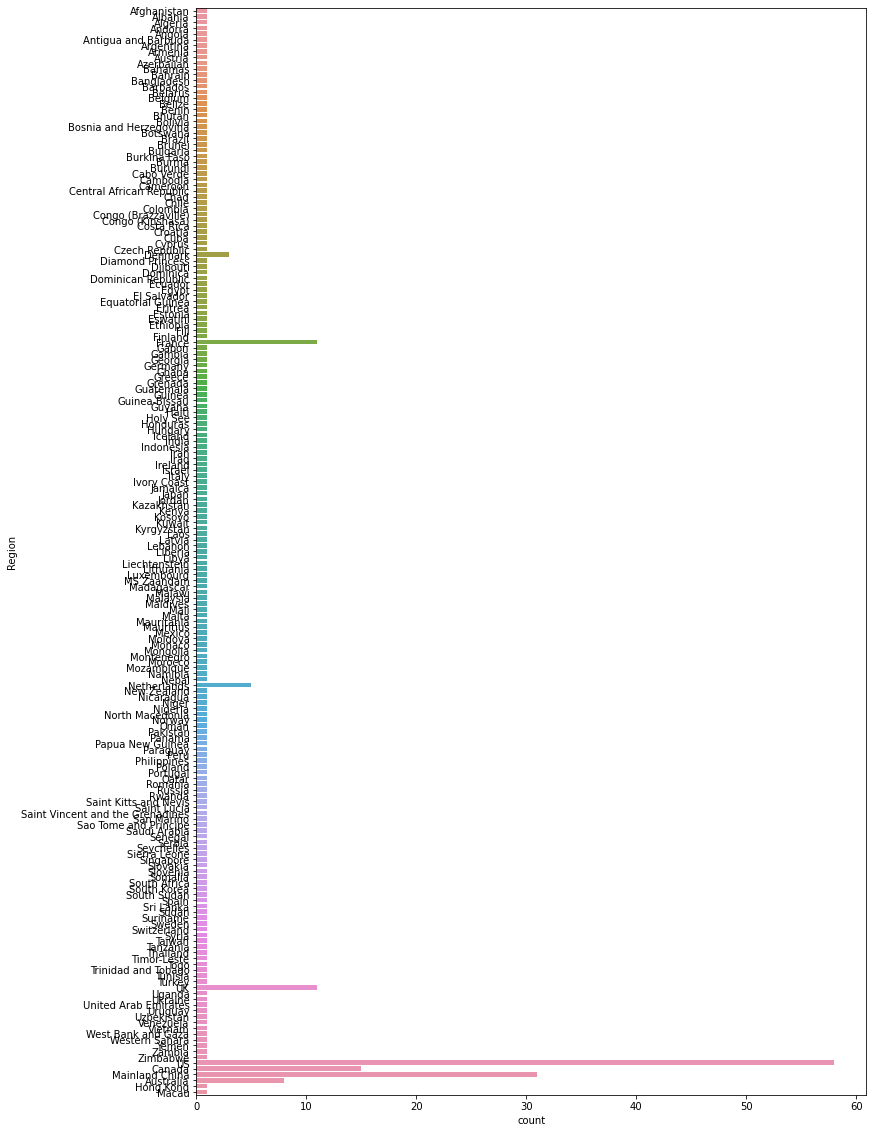

In [20]:
fig_dims = (12,20)
fig, ax  = plt.subplots(figsize=fig_dims)
sns.countplot(y = data.Region,ax=ax, data=data)

In [21]:
print(data.Region.value_counts())

US                58
Mainland China    31
Canada            15
UK                11
France            11
                  ..
South Sudan        1
Turkey             1
Brazil             1
Nigeria            1
Namibia            1
Name: Region, Length: 187, dtype: int64


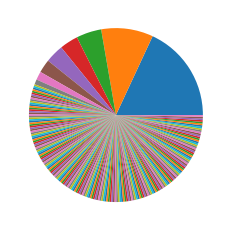

In [22]:
plt.pie(data.Region.value_counts())
plt.show()

The above pie chart suggests that almost half of the cases are present or focuused on 7 regions itself. Other Regions contribute very less cases individually.

In [23]:
new_data = data.Region.value_counts().head(10)
new_data

US                58
Mainland China    31
Canada            15
UK                11
France            11
Australia          8
Netherlands        5
Denmark            3
Guinea             1
Switzerland        1
Name: Region, dtype: int64

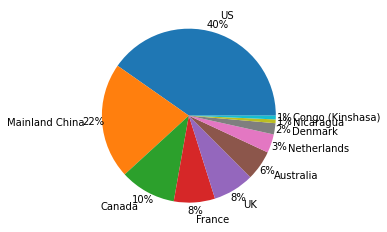

In [24]:
labels = ["US","Mainland China","Canada","France","UK","Australia","Netherlands","Denmark","Nicaragua","Congo (Kinshasa)"]
plt.pie(new_data, labels = labels, autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.2)

plt.show()